In [1]:
import pandas as pd
df_loan = pd.read_csv("loan_data.csv")
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [2]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [3]:
df_loan["outcome"].unique()

array(['default', 'paid off'], dtype=object)

In [4]:
X1 = df_loan[["purpose_", "home_", "emp_len_"]]
Y1 = df_loan["outcome"]
X1.head()

,purpose_,home_,emp_len_
0,major_purchase,RENT,> 1 Year
1,small_business,OWN,> 1 Year
2,other,RENT,> 1 Year
3,debt_consolidation,RENT,> 1 Year
4,other,RENT,> 1 Year


In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()

In [6]:
x = np.array([1, 2, 3]).reshape(-1, 1)
x = np.hstack((x, np.array([4, 5 ,6]).reshape(-1, 1)))
x

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
cols = X1.columns
x1 = le.fit_transform(X1[cols[0]]).reshape(-1, 1)
for col in cols[1:]:
    x1 = np.hstack((x1, le.fit_transform(X1[col].values).reshape(-1, 1)))
y1 = le.fit_transform(Y1.values)
x1, y1

(array([[3, 2, 1],
        [6, 1, 1],
        [5, 2, 1],
        ...,
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]]), array([0, 0, 0, ..., 1, 1, 1]))

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x1, y1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
gnb.class_count_, gnb.class_prior_, gnb.classes_, gnb.epsilon_

(array([22671., 22671.]),
 array([0.5, 0.5]),
 array([0, 1]),
 2.709891132463009e-09)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [14]:
df_loan3000 = pd.read_csv("loan3000.csv")
df_loan3000.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [15]:
X2 = df_loan3000[["borrower_score", "payment_inc_ratio"]]
Y2 = df_loan3000["outcome"]

In [16]:
x2 = X2.values
y2 = le.fit_transform(Y2.values)
x2, y2

(array([[ 0.4    ,  5.11135],
        [ 0.4    ,  5.43165],
        [ 0.7    ,  9.23003],
        ...,
        [ 0.2    , 15.4218 ],
        [ 0.45   ,  8.92335],
        [ 0.4    , 12.8819 ]]), array([1, 0, 1, ..., 0, 0, 0]))

In [17]:
lda.fit(x2, y2)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
lda.explained_variance_ratio_, lda.intercept_, lda.means_,lda.priors_, lda.scalings_

(array([1.]), array([-1.83566262]), array([[0.46280277, 8.86181347],
        [0.53906752, 7.4651989 ]]), array([0.48166667, 0.51833333]), array([[ 7.1758388 ],
        [-0.09967559]]))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
prob_default = lda.predict_proba(x2)[:,0]
prob_default

array([0.55354373, 0.55895342, 0.27269623, ..., 0.87053407, 0.5571326 ,
       0.67845819])

In [21]:
y_pred = lda.predict(x2)
new_data = np.hstack((x2, y_pred.reshape(-1, 1)))
new_data

array([[ 0.4    ,  5.11135,  0.     ],
       [ 0.4    ,  5.43165,  0.     ],
       [ 0.7    ,  9.23003,  1.     ],
       ...,
       [ 0.2    , 15.4218 ,  0.     ],
       [ 0.45   ,  8.92335,  0.     ],
       [ 0.4    , 12.8819 ,  0.     ]])

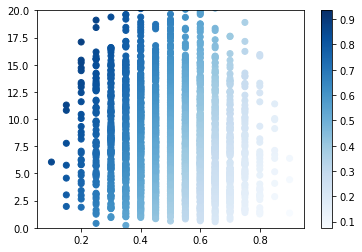

In [22]:
plt.scatter(X2["borrower_score"], X2["payment_inc_ratio"], c=prob_default, cmap="Blues")
plt.ylim((0,20))
plt.colorbar()

In [23]:
X3 = df_loan[["payment_inc_ratio", "purpose_", "home_", "emp_len_", "borrower_score"]]
Y3 = df_loan["outcome"]
X3.head()

,payment_inc_ratio,purpose_,home_,emp_len_,borrower_score
0,2.39320,major_purchase,RENT,> 1 Year,0.65
1,4.57170,small_business,OWN,> 1 Year,0.80
2,9.71600,other,RENT,> 1 Year,0.60
3,12.21520,debt_consolidation,RENT,> 1 Year,0.50
4,3.90888,other,RENT,> 1 Year,0.55


In [24]:
cols = X3.columns
x3 = X3[["payment_inc_ratio", "borrower_score"]].values
dums = pd.get_dummies(X3[cols[1:-1]]).drop(["purpose__credit_card", "home__MORTGAGE", "emp_len__ > 1 Year"], axis=1)
x3 = np.hstack((x3, dums.values))
cols = np.concatenate(([cols[0], cols[-1]], dums.columns))
y3 = le.fit_transform(Y3.values)
x3, y3

(array([[ 2.3932,  0.65  ,  0.    , ...,  0.    ,  1.    ,  0.    ],
        [ 4.5717,  0.8   ,  0.    , ...,  1.    ,  0.    ,  0.    ],
        [ 9.716 ,  0.6   ,  0.    , ...,  0.    ,  1.    ,  0.    ],
        ...,
        [ 9.9846,  0.55  ,  1.    , ...,  0.    ,  0.    ,  0.    ],
        [ 6.4525,  0.65  ,  1.    , ...,  0.    ,  0.    ,  0.    ],
        [11.8715,  0.5   ,  1.    , ...,  0.    ,  0.    ,  0.    ]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [25]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression()
print(cols)

['payment_inc_ratio' 'borrower_score' 'purpose__debt_consolidation'
 'purpose__home_improvement' 'purpose__major_purchase' 'purpose__medical'
 'purpose__other' 'purpose__small_business' 'home__OWN' 'home__RENT'
 'emp_len__ < 1 Year']


In [26]:
lgt.fit(x3, y3)
lgt.coef_, lgt.intercept_

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[-0.07976922,  4.57554784, -0.24797218, -0.4044953 , -0.2266196 ,
         -0.50533784, -0.6180739 , -1.20795252, -0.04855924, -0.15755301,
         -0.35556767]]), array([-1.26411287]))

In [27]:
cols.shape, lgt.coef_.shape

((11,), (1, 11))

In [28]:
np.hstack((cols.reshape(-1, 1), lgt.coef_.reshape(-1, 1)))

array([['payment_inc_ratio', -0.07976921521866545],
       ['borrower_score', 4.575547844008251],
       ['purpose__debt_consolidation', -0.2479721750190856],
       ['purpose__home_improvement', -0.4044952999413125],
       ['purpose__major_purchase', -0.2266195992450237],
       ['purpose__medical', -0.5053378432999645],
       ['purpose__other', -0.6180738986457126],
       ['purpose__small_business', -1.2079525193945468],
       ['home__OWN', -0.04855923917817141],
       ['home__RENT', -0.1575530097598884],
       ['emp_len__ < 1 Year', -0.35556767040597853]], dtype=object)

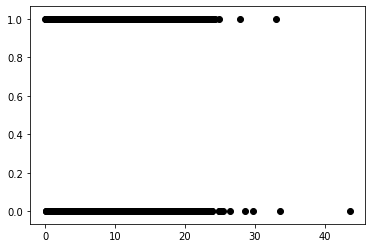

In [29]:
# NOT CORRECT partial residual for logit reg
y_pred = lgt.predict(x3)
resid = y3-y_pred
part_resid = y_pred+resid
plt.scatter(x = X3["payment_inc_ratio"].values, y=part_resid, color='k')

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y3, y_pred)
conf_mat

array([[14335,  8336],
       [ 8141, 14530]], dtype=int64)

In [34]:
# precision
print("precision", conf_mat[0,0]/sum(conf_mat[:,0]))
# recall
print("recall", conf_mat[0,0]/sum(conf_mat[0,:]))
# specificity
print("specificity", conf_mat[1,1]/sum(conf_mat[1,:]))

precision 0.6377914219612031
recall 0.6323055886374663
specificity 0.6409068854483702


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.692


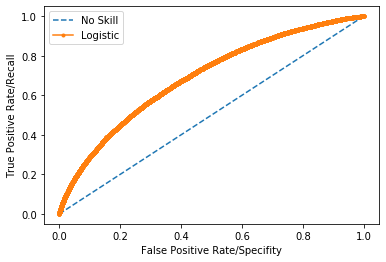

In [40]:
'''
SOURCE - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
'''

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y3))]

lr_probs = lgt.predict_proba(x3)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y3, ns_probs)
lr_auc = roc_auc_score(y3, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y3, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y3, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate/Specifity')
plt.ylabel('True Positive Rate/Recall')
# show the legend
plt.legend()


Text(0, 0.5, 'True Positive Rate/Recall')

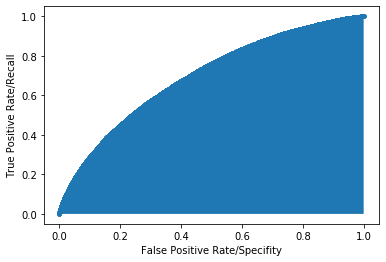

In [42]:
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.fill_between(lr_fpr, lr_tpr)
# axis labels
plt.xlabel('False Positive Rate/Specifity')
plt.ylabel('True Positive Rate/Recall')

In [46]:
(df_loan["outcome"]=="default").mean()

0.5

In [48]:
(y_pred>0).mean()

0.5043006484054519

In [65]:
X4 = df_loan[["payment_inc_ratio", "purpose_", "home_", "emp_len_", "dti", "revol_bal", "revol_util"]]
Y4 = df_loan["outcome"]
X4.head()

,payment_inc_ratio,purpose_,home_,emp_len_,dti,revol_bal,revol_util
0,2.39320,major_purchase,RENT,> 1 Year,1.00,1687,9.4
1,4.57170,small_business,OWN,> 1 Year,5.55,5210,32.6
2,9.71600,other,RENT,> 1 Year,18.08,9279,36.5
3,12.21520,debt_consolidation,RENT,> 1 Year,10.08,10452,91.7
4,3.90888,other,RENT,> 1 Year,7.06,11997,55.5


In [72]:
#X4["purpose_"].unique(), X4["home_"].unique(), X4["emp_len_"].unique() 
dums = pd.get_dummies(X4[["purpose_", "home_", "emp_len_"]]).drop(["purpose__debt_consolidation", "home__OWN"], axis=1)
dums.columns
x4 = np.hstack((X4.drop(["purpose_", "home_", "emp_len_"], axis=1).values, dums))
y4 = Y4.replace({"default":1, "paid off":0}).values

In [74]:
lgt1 = LogisticRegression()
lgt1.fit(x4, y4)
y_pred1 = lgt1.predict(x4)
(y_pred1>0).mean()

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4972211194918619

In [76]:
lgt1 = LogisticRegression(class_weight="balanced")
lgt1.fit(x4, y4)
y_pred1 = lgt1.predict(x4)
(y_pred1>0).mean()

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4972211194918619

In [77]:
'''SMOTE with imblearn'''

'SMOTE with imblearn'